<a href="https://colab.research.google.com/github/AyushSrivastava27/EthVision/blob/main/EthVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset:https://finance.yahoo.com/quote/ETH-USD/history

In [1]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-60e2b934-eaeb-664b-21d1-d0ea73bc32fc)


In [2]:
!wget https://raw.githubusercontent.com/AyushSrivastava27/EthVision/main/ETH-USD.csv

--2024-03-30 15:19:57--  https://raw.githubusercontent.com/AyushSrivastava27/EthVision/main/ETH-USD.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186340 (182K) [text/plain]
Saving to: ‘ETH-USD.csv’

ETH-USD.csv         100%[===================>] 181.97K  --.-KB/s    in 0.01s   

2024-03-30 15:19:57 (11.9 MB/s) - ‘ETH-USD.csv’ saved [186340/186340]



In [3]:
import pandas as pd
df = pd.read_csv("/content/ETH-USD.csv",
                 parse_dates = ["Date"],
                 index_col = ["Date"])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2328 entries, 2017-11-09 to 2024-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2328 non-null   float64
 1   High       2328 non-null   float64
 2   Low        2328 non-null   float64
 3   Close      2328 non-null   float64
 4   Adj Close  2328 non-null   float64
 5   Volume     2328 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 127.3 KB


In [5]:
df = df.astype({"Close":'float64'})

In [6]:
len(df)

2328

In [7]:
# Only want closing price for each day
ethereum_prices = pd.DataFrame(df["Close"]).rename(columns={"Close": "Price"})
ethereum_prices.head()

,Price
Date,
2017-11-09,320.884003
2017-11-10,299.252991
2017-11-11,314.681000
2017-11-12,307.907990
2017-11-13,316.716003


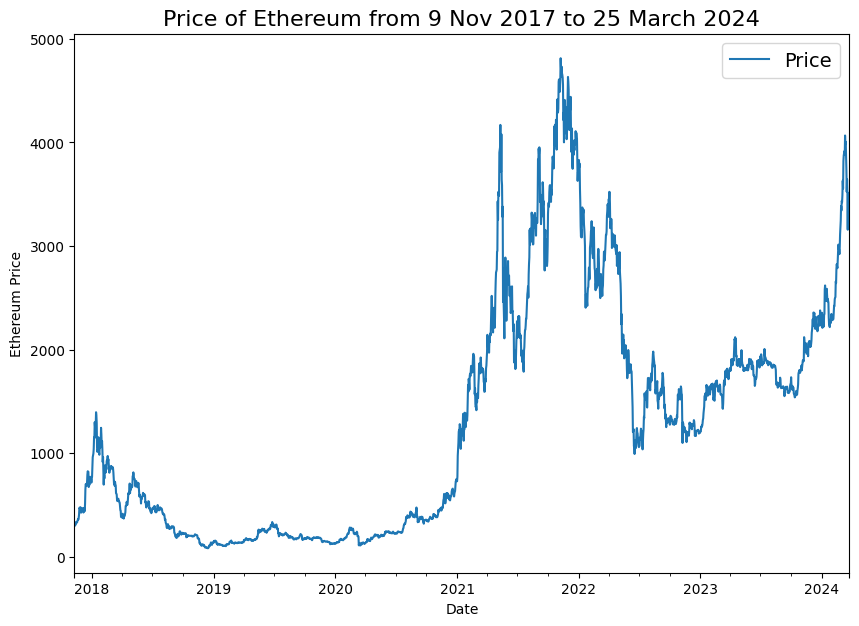

In [8]:
import matplotlib.pyplot as plt
ethereum_prices.plot(figsize = (10,7))
plt.ylabel("Ethereum Price")
plt.title("Price of Ethereum from 9 Nov 2017 to 25 March 2024", fontsize = 16)
plt.legend(fontsize = 14);


### Importing Time Series Data with Python's CSV Module

In [9]:
import csv
from datetime import datetime

timesteps = []
eth_price = []
with open("/content/ETH-USD.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%Y-%m-%d"))
    eth_price.append(line[4])

# View first 10 of each
timesteps[:10], eth_price[:10]

([datetime.datetime(2017, 11, 9, 0, 0),
  datetime.datetime(2017, 11, 10, 0, 0),
  datetime.datetime(2017, 11, 11, 0, 0),
  datetime.datetime(2017, 11, 12, 0, 0),
  datetime.datetime(2017, 11, 13, 0, 0),
  datetime.datetime(2017, 11, 14, 0, 0),
  datetime.datetime(2017, 11, 15, 0, 0),
  datetime.datetime(2017, 11, 16, 0, 0),
  datetime.datetime(2017, 11, 17, 0, 0),
  datetime.datetime(2017, 11, 18, 0, 0)],
 ['320.884003',
  '299.252991',
  '314.681000',
  '307.907990',
  '316.716003',
  '337.631012',
  '333.356995',
  '330.924011',
  '332.394012',
  '347.612000'])

In [10]:
for i in range(len(eth_price)):
    if eth_price[i] != 'null':
        eth_price[i] = float(eth_price[i])
    else:
        eth_price[i] = None

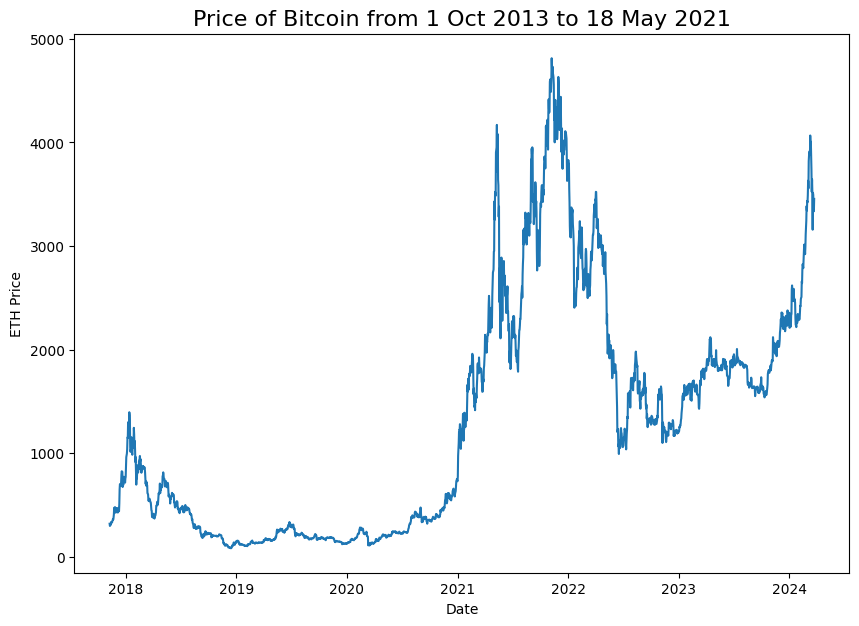

In [11]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, eth_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("ETH Price");

### Creating Train and Test Set (for time series data)

In [12]:
timesteps = ethereum_prices.index.to_numpy()
prices = ethereum_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2017-11-09T00:00:00.000000000', '2017-11-10T00:00:00.000000000',
        '2017-11-11T00:00:00.000000000', '2017-11-12T00:00:00.000000000',
        '2017-11-13T00:00:00.000000000', '2017-11-14T00:00:00.000000000',
        '2017-11-15T00:00:00.000000000', '2017-11-16T00:00:00.000000000',
        '2017-11-17T00:00:00.000000000', '2017-11-18T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([320.884003, 299.252991, 314.681   , 307.90799 , 316.716003,
        337.631012, 333.356995, 330.924011, 332.394012, 347.612   ]))

In [13]:
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1862, 466, 1862, 466)

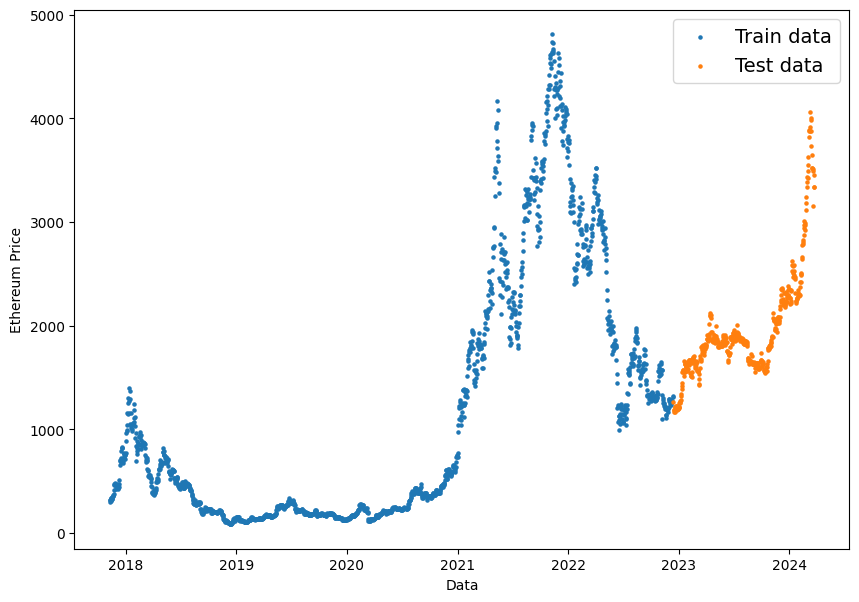

In [14]:
plt.figure(figsize= (10, 7))
plt.scatter(X_train, y_train, s=5, label= "Train data")
plt.scatter(X_test, y_test, s=5, label= "Test data")
plt.xlabel("Data")
plt.ylabel("Ethereum Price")
plt.legend(fontsize=14)
plt.show();

**Creating a plotting Function**

In [15]:
def plot_time_series(timesteps, values, format='.',start=0, end= None, label= None):
  plt.plot(timesteps[start:end], values[start:end], format, label= label)
  plt.xlabel("Time")
  plt.ylabel("Ethereum Price")
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)

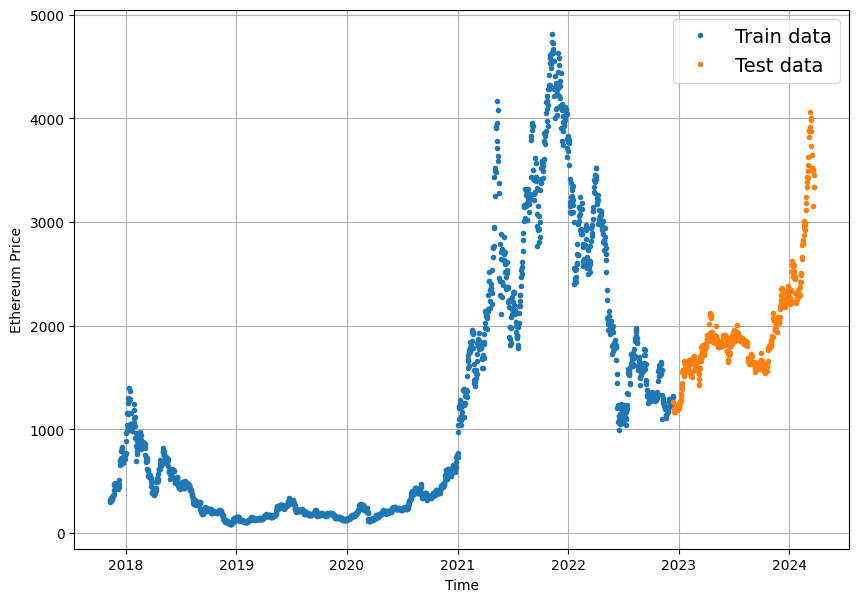

In [16]:
plt.figure(figsize= (10, 7))
plot_time_series(timesteps= X_train, values= y_train, label= "Train data")
plot_time_series(timesteps= X_test, values= y_test, label= "Test data")

## Modelling Experiment

### Naive Model (baseline)



In [17]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([1266.353882, 1168.259399, 1188.149536, 1184.71521 , 1167.609863,
        1217.703613, 1213.599976, 1218.182129, 1220.159424, 1221.14856 ]),
 array([3883.140381, 3735.220215, 3522.860107, 3642.413086, 3517.985107,
        3157.618164, 3513.393066, 3492.991211, 3333.687988, 3336.593994]))

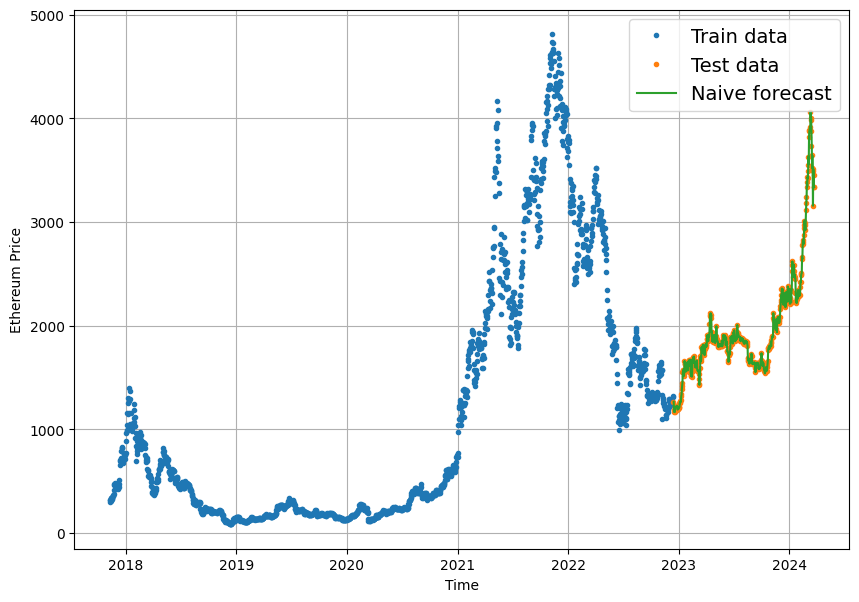

In [18]:
plt.figure(figsize= (10, 7))
plot_time_series(timesteps= X_train, values= y_train, label= "Train data")
plot_time_series(timesteps= X_test, values= y_test, label= "Test data")
plot_time_series(timesteps= X_test[1:], values= naive_forecast, format= "-", label= "Naive forecast");

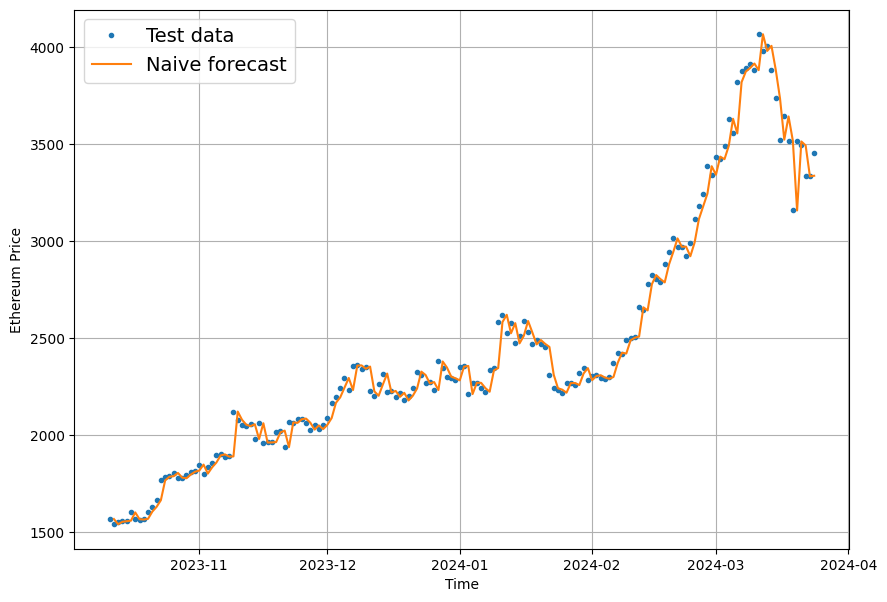

In [19]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

### Evaluating a time series model

**Scale-dependent errors**
- MAE (mean absolute error)
- RMSE (root mean square error)

**Percentage errors**
- MAPE (mean absolute percentage error)
- sMAPE (symmetric mean absolute error)

**Scaled Errors**
- MASE (mean absolute scaled error)

In [20]:
import tensorflow as tf

In [21]:
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return mae / mae_naive_no_season

In [22]:
def evaluate_preds(y_true, y_pred):
  # float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}


In [23]:
naive_results = evaluate_preds(y_true= y_test[1:],
                               y_pred = naive_forecast)
naive_results

{'mae': 37.67836,
 'mse': 3442.704,
 'rmse': 58.67456,
 'mape': 1.8211035,
 'mase': 1.0034677}

### Windowing Dataset

In [24]:
HORIZON = 1
WINDOW_SIZE = 7

In [25]:
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [26]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [27]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

  windowed_array = x[window_indexes]

  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [28]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2321, 2321)

In [29]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [320.884003 299.252991 314.681    307.90799  316.716003 337.631012
 333.356995] -> Label: [330.924011]
Window: [299.252991 314.681    307.90799  316.716003 337.631012 333.356995
 330.924011] -> Label: [332.394012]
Window: [314.681    307.90799  316.716003 337.631012 333.356995 330.924011
 332.394012] -> Label: [347.612]


In [30]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [3735.220215 3522.860107 3642.413086 3517.985107 3157.618164 3513.393066
 3492.991211] -> Label: [3333.687988]
Window: [3522.860107 3642.413086 3517.985107 3157.618164 3513.393066 3492.991211
 3333.687988] -> Label: [3336.593994]
Window: [3642.413086 3517.985107 3157.618164 3513.393066 3492.991211 3333.687988
 3336.593994] -> Label: [3454.636475]


### Turning Windows into Training and Test Sets

In [31]:
def make_train_test_splits(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [32]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1856, 465, 1856, 465)

In [33]:
train_windows[:5], train_labels[:5]

(array([[320.884003, 299.252991, 314.681   , 307.90799 , 316.716003,
         337.631012, 333.356995],
        [299.252991, 314.681   , 307.90799 , 316.716003, 337.631012,
         333.356995, 330.924011],
        [314.681   , 307.90799 , 316.716003, 337.631012, 333.356995,
         330.924011, 332.394012],
        [307.90799 , 316.716003, 337.631012, 333.356995, 330.924011,
         332.394012, 347.612   ],
        [316.716003, 337.631012, 333.356995, 330.924011, 332.394012,
         347.612   , 354.385986]]),
 array([[330.924011],
        [332.394012],
        [347.612   ],
        [354.385986],
        [366.730011]]))

In [34]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

### Make a Modelling Checkpoint

In [35]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

In [36]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
15/15 [==============================] - 2s 46ms/step - loss: 795.8201 - mae: 795.8201 - val_loss: 406.6513 - val_mae: 406.6513
Epoch 2/100
15/15 [==============================] - 0s 28ms/step - loss: 151.5315 - mae: 151.5315 - val_loss: 121.8079 - val_mae: 121.8079
Epoch 3/100
15/15 [==============================] - 0s 29ms/step - loss: 87.6474 - mae: 87.6474 - val_loss: 65.2663 - val_mae: 65.2663
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 71.2415 - mae: 71.2415 - val_loss: 98.4335 - val_mae: 98.4335
Epoch 5/100
15/15 [==============================] - 0s 28ms/step - loss: 71.5300 - mae: 71.5300 - val_loss: 61.3937 - val_mae: 61.3937
Epoch 6/100
15/15 [==============================] - 0s 28ms/step - loss: 65.4953 - mae: 65.4953 - val_loss: 60.7681 - val_mae: 60.7681
Epoch 7/100
15/15 [==============================] - 0s 30ms/step - loss: 64.7019 - mae: 64.7019 - val_loss: 60.3850 - val_mae: 60.3850
Epoch 8/100
15/15 [======================

In [37]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

15/15 [==============================] - 0s 2ms/step - loss: 52.2591 - mae: 52.2591


[52.25906753540039, 52.25906753540039]

In [38]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

15/15 [==============================] - 0s 2ms/step - loss: 37.3203 - mae: 37.3203


[37.3203239440918, 37.3203239440918]

In [39]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [40]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

15/15 [==============================] - 0s 2ms/step


(465,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([1278.6638, 1184.4573, 1182.0261, 1183.1886, 1174.8164, 1209.2539,
        1210.3473, 1223.9496, 1220.754 , 1221.606 ], dtype=float32)>)

In [41]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 37.320324,
 'mse': 3327.7942,
 'rmse': 57.687035,
 'mape': 1.8075267,
 'mase': 0.99393237}

In [42]:
naive_results

{'mae': 37.67836,
 'mse': 3442.704,
 'rmse': 58.67456,
 'mape': 1.8211035,
 'mase': 1.0034677}

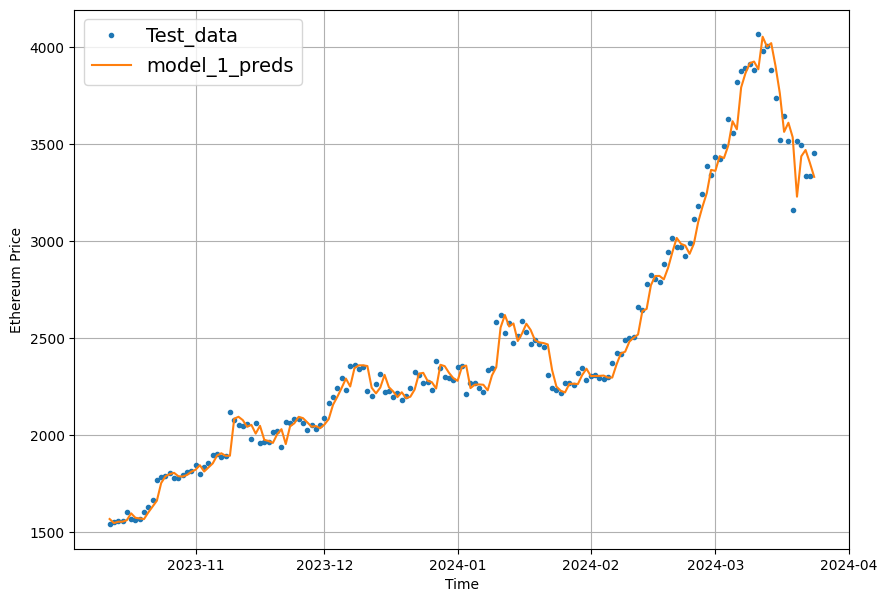

In [43]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

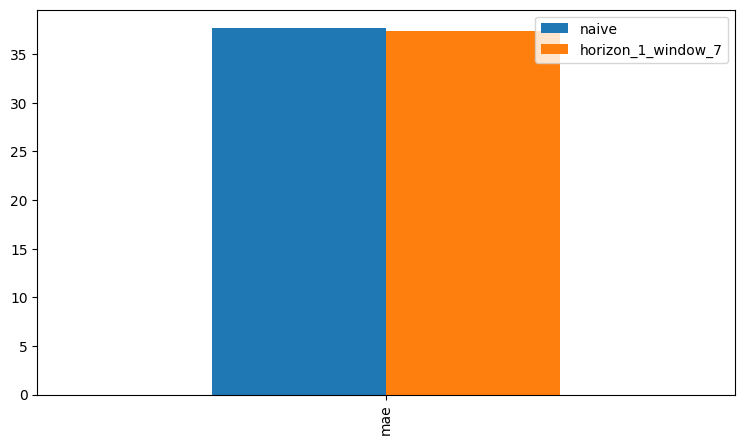

In [44]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"]}, index=["mae"]).plot(figsize=(9, 5), kind="bar");

### Model 2: Conv1D

In [45]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1856, 465, 1856, 465)

In [46]:
train_windows[0].shape

(7,)

In [47]:
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[320.884]
 [299.253]
 [314.681]
 [307.908]
 [316.716]
 [337.631]
 [333.357]]


In [48]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_conv1D")

# Compile model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_2.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [49]:
model_2.summary()

Model: "model_2_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_2 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
# Load in best performing Conv1D model and evaluate it on the test data
model_2 = tf.keras.models.load_model("model_experiments/model_2_conv1D")
model_2.evaluate(test_windows, test_labels)

15/15 [==============================] - 0s 6ms/step - loss: 37.6355


37.63552474975586

In [51]:
# Make predictions
model_2_preds = make_preds(model_2, test_windows)
model_2_preds[:10]

15/15 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1278.2523, 1193.9338, 1183.698 , 1181.3917, 1164.6931, 1202.4098,
       1210.5211, 1218.0248, 1221.6748, 1221.5308], dtype=float32)>

In [52]:
# Evaluate predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 37.635525,
 'mse': 3397.3582,
 'rmse': 58.28686,
 'mape': 1.8221929,
 'mase': 1.002327}

Model 3: N-Beats Algorithm

In [53]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [54]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [55]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [56]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.9656488   0.01287943 -1.0539099  -0.02233201  1.4512066  -0.51846296
  0.96519524]
Forecast: 0.5993768572807312


In [57]:
HORIZON = 1
WINDOW_SIZE = 7

In [58]:
ethereum_prices.head()

,Price
Date,
2017-11-09,320.884003
2017-11-10,299.252991
2017-11-11,314.681000
2017-11-12,307.907990
2017-11-13,316.716003


In [59]:
ethereum_prices_nbeats = ethereum_prices.copy()
for i in range(WINDOW_SIZE):
  ethereum_prices_nbeats[f"Price+{i+1}"] = ethereum_prices_nbeats["Price"].shift(periods=i+1)
ethereum_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2017-11-16,330.924011,333.356995,337.631012,316.716003,307.907990,314.681000,299.252991,320.884003
2017-11-17,332.394012,330.924011,333.356995,337.631012,316.716003,307.907990,314.681000,299.252991
2017-11-18,347.612000,332.394012,330.924011,333.356995,337.631012,316.716003,307.907990,314.681000
2017-11-19,354.385986,347.612000,332.394012,330.924011,333.356995,337.631012,316.716003,307.907990
2017-11-20,366.730011,354.385986,347.612000,332.394012,330.924011,333.356995,337.631012,316.716003


In [60]:
# Make features and labels
X = ethereum_prices_nbeats.dropna().drop("Price", axis=1)
y = ethereum_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(1856, 1856, 465, 465)

In [61]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [62]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [63]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]
